In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [ ]:
df=pd.read_csv('/content/train.csv')
df.head()
df.dtypes
df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]>

In [ ]:
df2=df[[column for column in df if df[column].count()/len(df)>0.9
]]
print("list of dropped columns :")
for c in df.columns:
  if c not in df2.columns:
    print(c,end=", ")
print("\n")
df=df2

list of dropped columns :
LotFrontage, Alley, FireplaceQu, PoolQC, Fence, MiscFeature, 



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


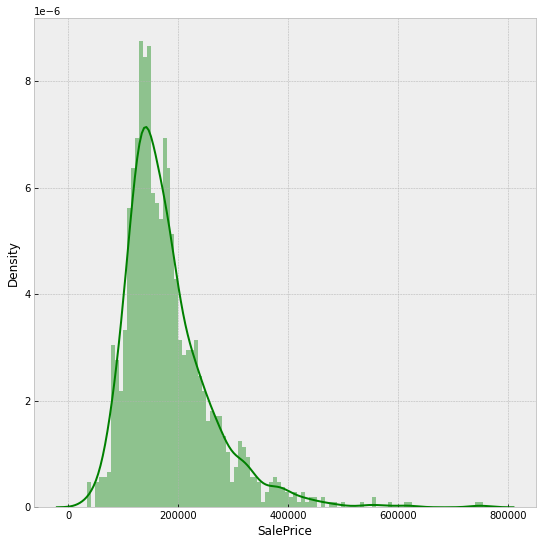

In [ ]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9,9))
sns.distplot(df['SalePrice'],color='g',bins=100,hist_kws={'alpha':0.4})
plt.show()

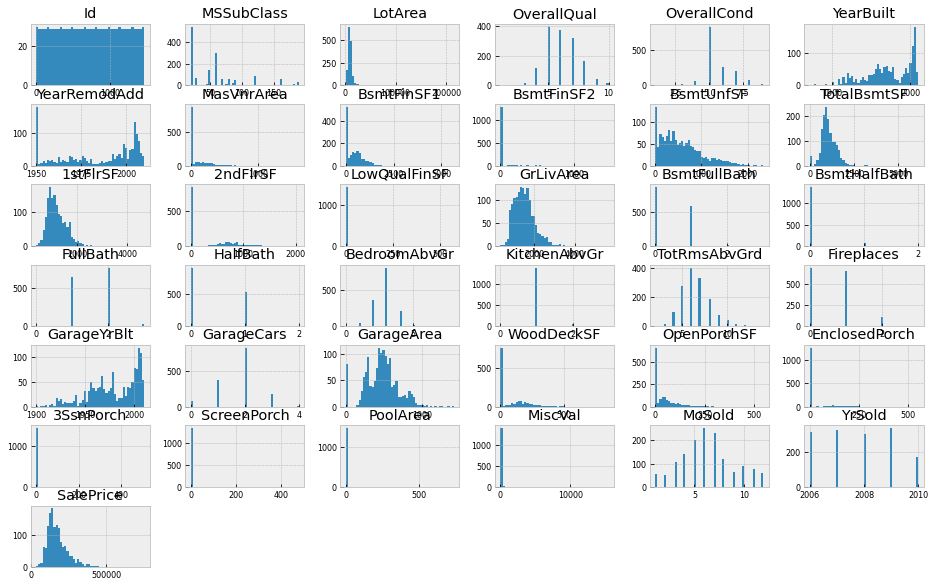

In [ ]:
list(set(df.dtypes.tolist()))
df_num=df.select_dtypes(include=['float64','int64'])
df_num.hist(figsize=(16,10),bins=50,xlabelsize=8,ylabelsize=8)
plt.show()

In [ ]:
df_num.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


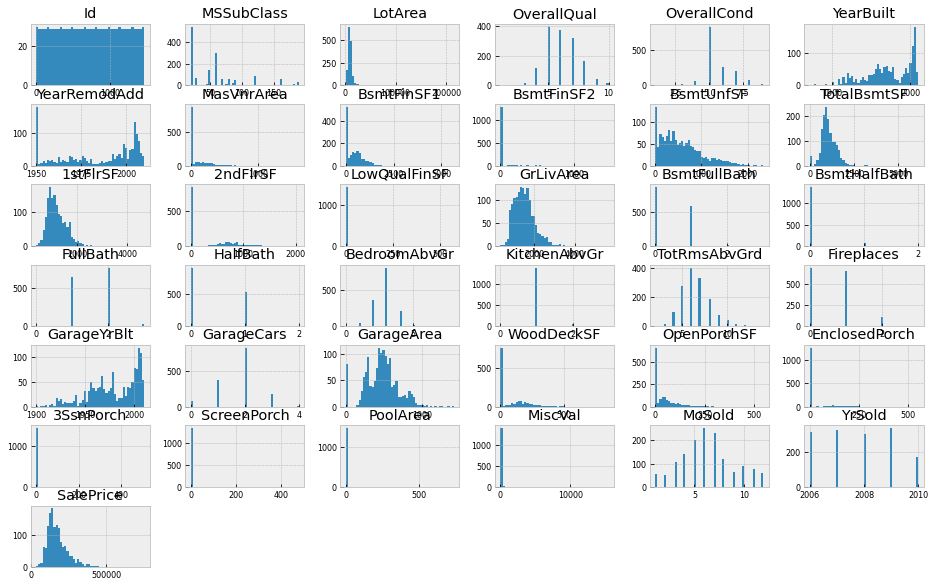

In [ ]:
list(set(df.dtypes.tolist()))
df_num=df.select_dtypes(include=['float64','int64'])
df_num.hist(figsize=(16,10),bins=50,xlabelsize=8,ylabelsize=8)
plt.show()

In [ ]:
df_num_corr=df_num.corr()['SalePrice'][:1]
golden_feautre_list=df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=True)
golden_feautre_list


Series([], Name: SalePrice, dtype: float64)

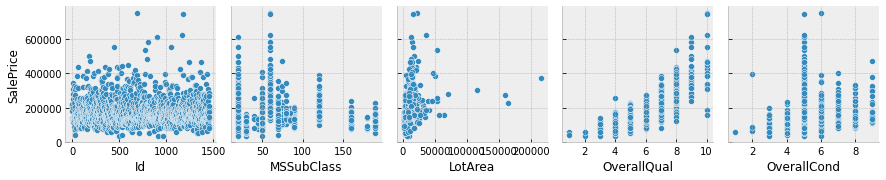

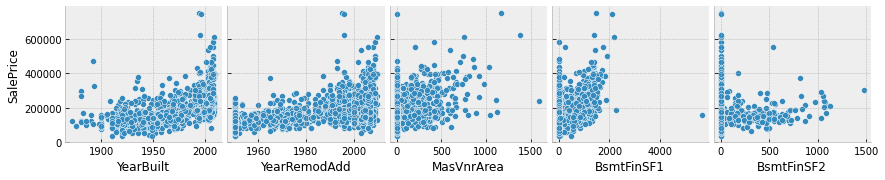

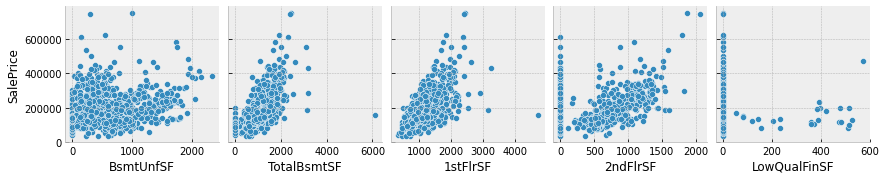

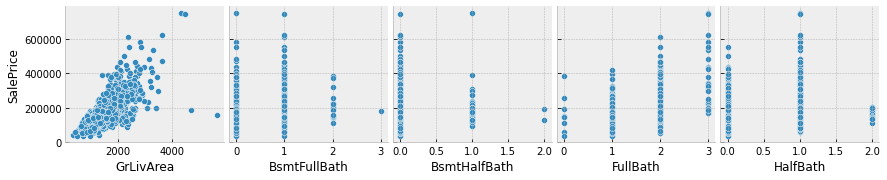

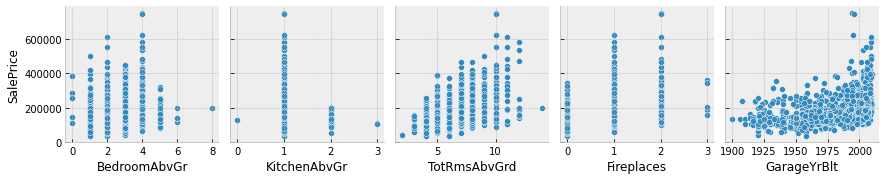

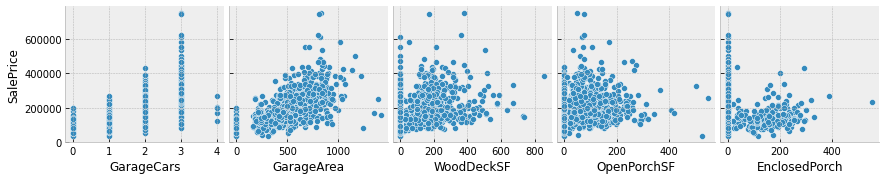

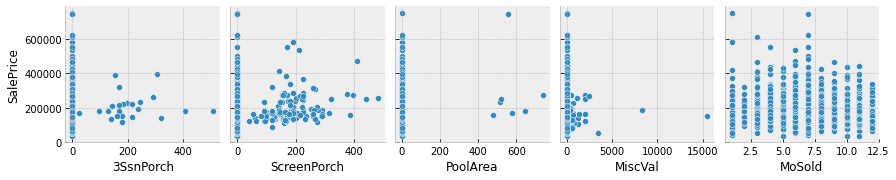

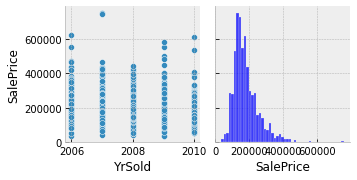

In [ ]:
for i in range(0,len(df_num.columns),5):
  sns.pairplot(data=df_num,x_vars=df_num.columns[i:i+5],y_vars='SalePrice')

In [ ]:
import operator

individual_features_df=[]
for i in range(0, len(df_num.columns)-1):
  tmpDf=df_num[[df_num.columns[i], 'SalePrice']]
  tmpDf=tmpDf[tmpDf[df_num.columns[i]]!= 0]
  individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]:feature.corr()['SalePrice '][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
  print("{:>15} : {:>15}".format(key,value))


KeyError: ignored